In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

## Visualization ##

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [3]:
mag_sec = Table.read_table('mag_sect.csv')

In [4]:
mag = Table().with_columns(
    'Zav', mag_sec.column('Zav'),
    'H', mag_sec.column('H')
    )

In [5]:
mag

Zav,H
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


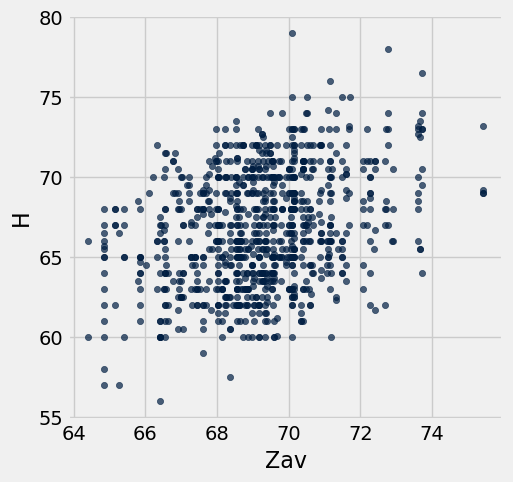

In [6]:
mag.scatter('Zav')

In [7]:
hybrid = Table.read_table('hybrid.csv')

In [8]:
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


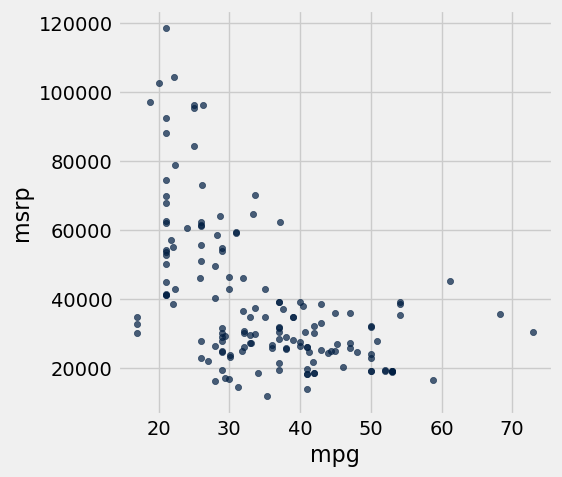

In [9]:
hybrid.scatter('mpg', 'msrp')

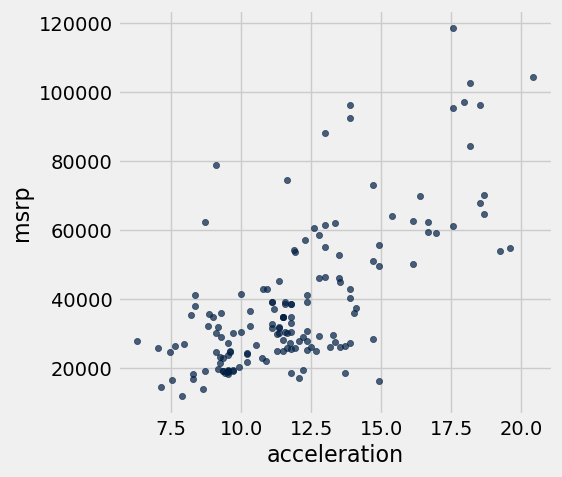

In [10]:
hybrid.scatter('acceleration', 'msrp')

In [11]:
suv = hybrid.where('class', 'SUV')
suv.num_rows

39

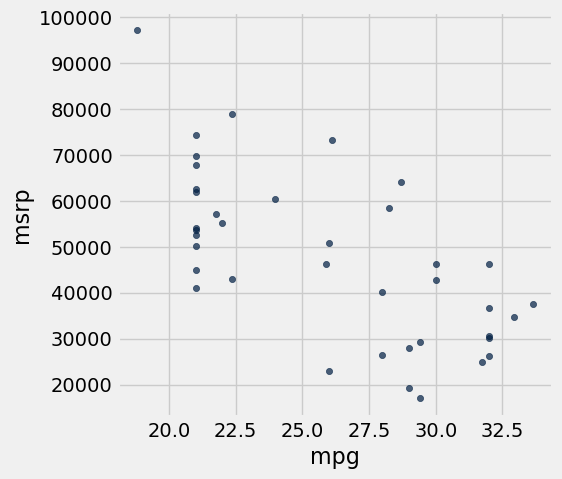

In [12]:
suv.scatter('mpg', 'msrp')

In [13]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

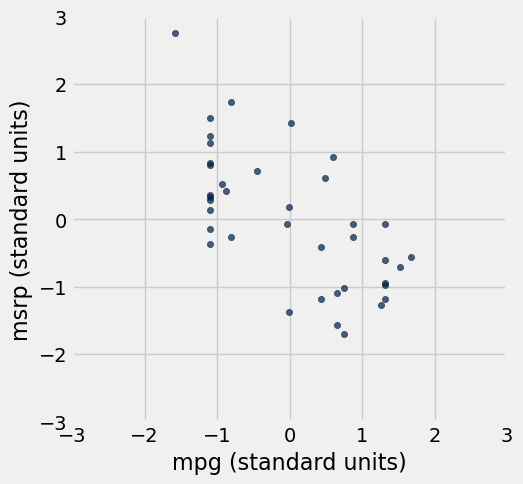

In [14]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

## Calculation ##

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

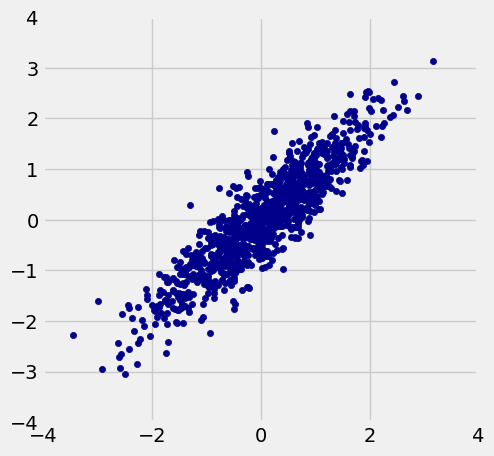

In [28]:
# Draws a scatter diagram of variables that have the specified correlation

r_scatter(0.9)

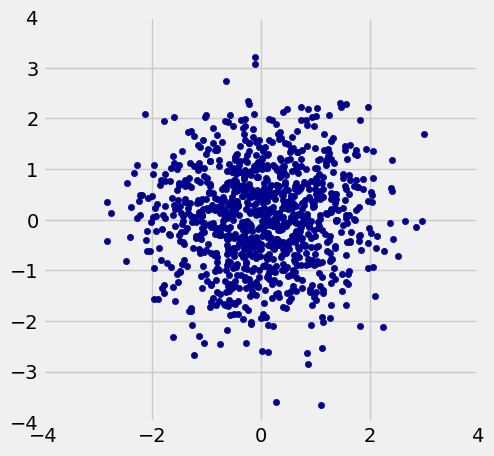

In [23]:
r_scatter(0)

### Calculating $r$ ###

In [26]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


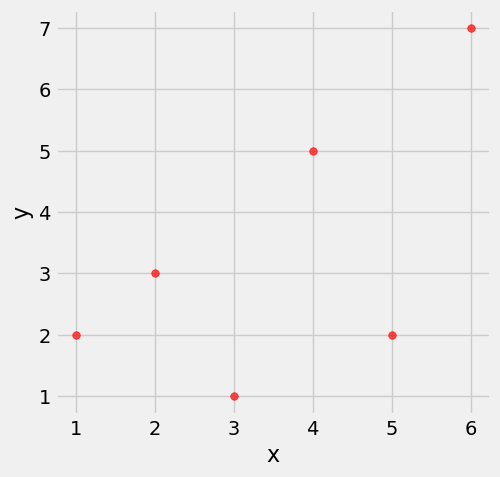

In [27]:
t.scatter('x', 'y', s=30, color='red')

In [29]:
t= t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


In [30]:
su_product = t.column(2) * t.column(3)
t = t.with_column('product of standard units', su_product)
t

x,y,x (standard units),y (standard units),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [31]:
# r is the average of the products of standard units

r = np.mean(t.column(4))
r

0.61741639718977093

In [33]:
def correlation(tbl, x, y):
    """tbl is a table; 
    x and y are column labels"""
    x_in_standard_units = standard_units(tbl.column(x))
    y_in_standard_units = standard_units(tbl.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)  

In [34]:
correlation(t, 'x', 'y')

0.61741639718977093

In [35]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

In [36]:
correlation(t, 'x', 'y')

0.61741639718977093

In [37]:
correlation(t, 'y', 'x')

0.61741639718977093

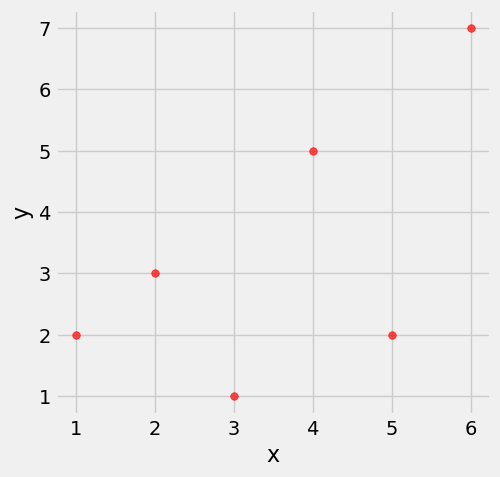

In [38]:
t.scatter('x', 'y', s=30, color='red')

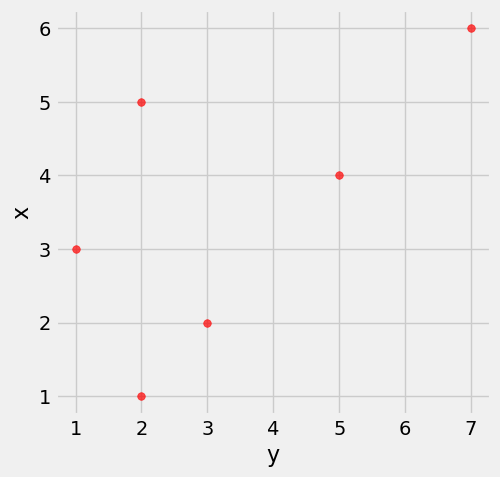

In [39]:
t.scatter('y', 'x', s=30, color='red')

In [40]:
correlation(t, 'y', 'x')

0.61741639718977093

## Interpretation ##

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

### Nonlinearity ###

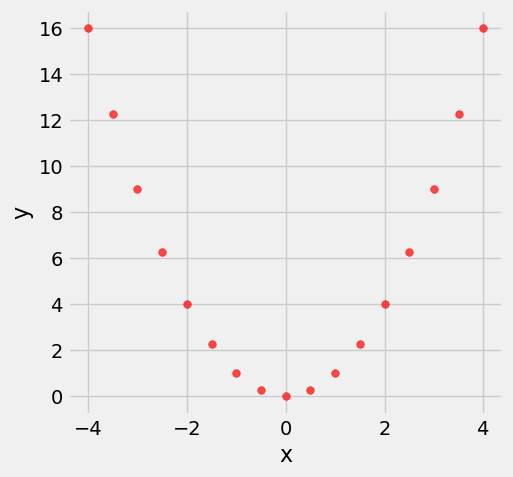

In [41]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [42]:
correlation(nonlinear, 'x', 'y')

0.0

### Outliers ###

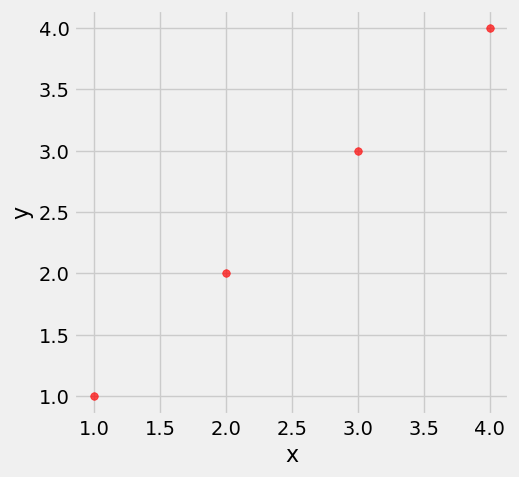

In [43]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [44]:
correlation(line, 'x', 'y')

1.0

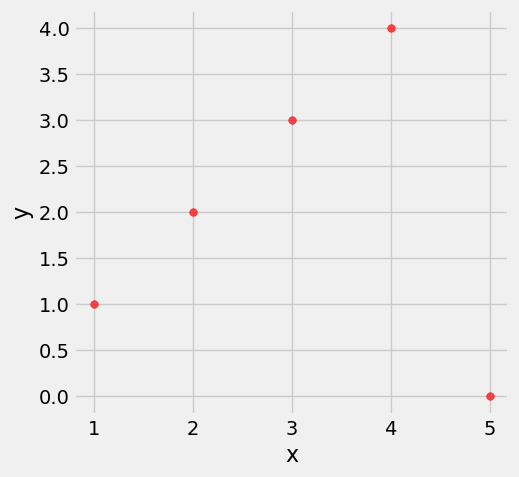

In [45]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [46]:
correlation(outlier, 'x', 'y')

0.0

### Ecological Correlation ###

In [47]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


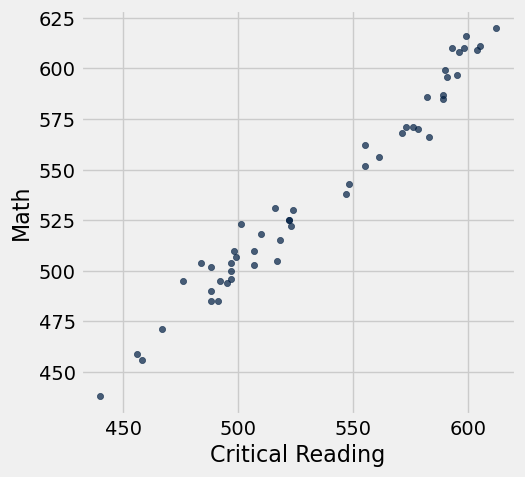

In [48]:
sat2014.scatter('Critical Reading', 'Math')

In [49]:
correlation(sat2014, 'Critical Reading', 'Math')

0.98475584110674341